In [1]:
from libraries import MyDAQ
from libraries import functions as H
import matplotlib.pyplot as plt
import numpy as np
import nidaqmx as dx
from scipy.signal import sawtooth, square
import libraries
from libraries import PMConverter
from scipy.fft import rfft, rfftfreq, irfft
import time
all_list = [H.RC_C]

PM = PMConverter()
daq = MyDAQ()
daq.name = 'MyDAQ1'
daq.samplerate = 200000
read_channel = ['AI0', 'AI1']	
write_channel = 'AO0'

In [5]:
frequencies = np.logspace(0, 5, 10)
print(frequencies)
t, signal = daq.generateMultipleWaveforms('sine', frequencies, 6, 0, 8, daq.samplerate)



[1.00000000e+00 3.59381366e+00 1.29154967e+01 4.64158883e+01
 1.66810054e+02 5.99484250e+02 2.15443469e+03 7.74263683e+03
 2.78255940e+04 1.00000000e+05]


In [6]:
data0, data1 = daq.readwrite(signal, read_channel, write_channel)

DaqWriteError: Attempted writing analog data that is too large or too small. Change Minimum Value and Maximum Value to reflect the range of the channel.
Data:  13.835238
Specified Range Minimum: -10.0
Specified Range Maximum:  10.0

Task Name: write

Status Code: -200561

c:\Users\boazf\OneDrive\Documents\GitHub\PE3--bobo-damster-\sessiecode\libraries\pmconverter.py:116: RuntimeWarning: invalid value encountered in sin
  ref_sin = np.sin(t * 2 * np.pi * carrierFrequency)
c:\Users\boazf\OneDrive\Documents\GitHub\PE3--bobo-damster-\sessiecode\libraries\pmconverter.py:117: RuntimeWarning: invalid value encountered in cos
  ref_cos = np.cos(t * 2 * np.pi * carrierFrequency)


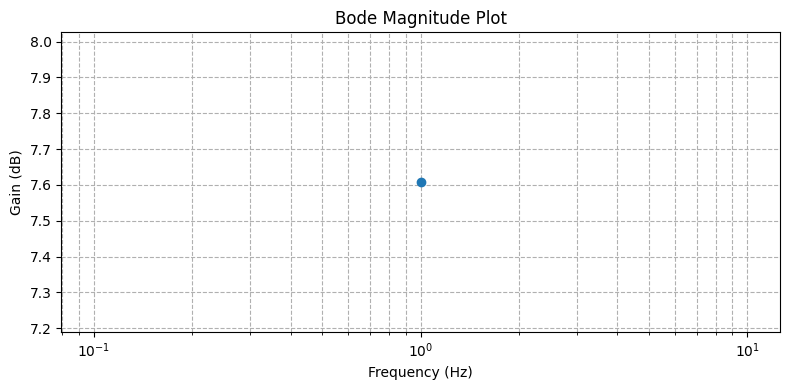

In [ ]:
DAs = []
DPs = []
AAs = []
APs = []
for f in frequencies:
    A, P = PM.lock_in_amplifier(data0, daq.samplerate, f, t)
    DAs.append(A)
    DPs.append(P)

    A, P = PM.lock_in_amplifier(data1, daq.samplerate, f, t)
    AAs.append(A)
    APs.append(P)

gains = np.asarray(AAs) / np.asarray(DAs)

plt.figure(figsize=(8, 4))
plt.semilogx(frequencies, gains, marker='o')  # semilog x-axis
plt.title('Bode Magnitude Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.show()
